In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

# Initial Exploratory Data Analysis on the NBA Dataset

In [ ]:
def download_data():
  download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
  target_csv_path = 'nba_all_elo.csv'

  response = requests.get(download_url)
  response.raise_for_status()   # Check that the request was successful
  with open(target_csv_path, 'wb') as f:
    f.write(response.content)
  print('Download ready.')

In [ ]:
download_data()

Download ready.


In [ ]:
nba = pd.read_csv('nba_all_elo.csv')

In [ ]:
type(nba)

pandas.core.frame.DataFrame

In [ ]:
len(nba)

126314

In [ ]:
nba.shape

(126314, 23)

In [ ]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


So far, we've downloaded the dataset, and changed the floating point precision of what is displayed in the dataframe. Let's look at all of the data types stored in the columns of the dataframe.

In [ ]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

There doesn't appear to be missing data in the main columns. Most of the columns (10/23) are of the catch-all data type "object."

Let's now look at some summary statistics.

In [ ]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


By default, Pandas will only perform ```describe()``` on numeric columns, but we can include other data types as well:



In [ ]:
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,197405060UTS,NBA,1/2/2009,BOS,Lakers,BOS,Lakers,H,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


The above ```describe()``` method provided some additional insight. For instance, there are 103 team IDs, but 53 franchise IDs. The most common team ID is BOS, but the most common franchise ID is Lakers. Let's investigate this further.

In [ ]:
nba['team_id'].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
TRH      60
DTF      60
PIT      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [ ]:
nba['fran_id'].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Denver       

The Lakers as a franchise have played 6024 games, but only 5078 of them were played by the LA Lakers. Who was the other Lakers team?

In [ ]:
nba.loc[nba['fran_id']=='Lakers', 'team_id'].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [ ]:
nba.loc[nba['team_id']=='MNL', 'date_game'].min()

'1/1/1949'

In [ ]:
nba.loc[nba['team_id']=='MNL', 'date_game'].max()

'4/9/1959'

In [ ]:
nba.loc[nba['team_id']=='MNL', 'date_game'].agg(('min', 'max'))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

The Minnesota Lakers played about 950 games from 1949 to 1959.

Let's find out how many points the Boston Celtics have scored during the time period of this dataset.

In [ ]:
nba.loc[nba['team_id']=='BOS', 'pts'].sum()

626484

# Getting to Know Pandas' Data Structures

## Series Objects

The most basic Python data structure is the _list_, which is a good starting point for getting to know the ```pandas.Series``` object.

In [ ]:
revenues = pd.Series([5555, 7000, 1980])
revenues

0    5555
1    7000
2    1980
dtype: int64

The entries of a series dataset can be accessed by value or by index.

In [ ]:
revenues.values

array([5555, 7000, 1980])

In [ ]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
type(revenues.values)

numpy.ndarray

We can see that the values of a Pandas series object are actually NumPy nd arrays. However, unlike NumPy arrays, Pandas objects have control over the indexing.

In [ ]:
city_revenues = pd.Series(
    [4200, 8000, 6500],
    index = ['Amsterdam', 'Toronto', 'Tokyo']
)

In [ ]:
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [ ]:
city_revenues.index

Index(['Amsterdam', 'Toronto', 'Tokyo'], dtype='object')

We can also construct a series object using a dictionary.

In [ ]:
city_employee_count = pd.Series({'Amsterdam': 8, 'Tokyo': 5})

In [ ]:
city_employee_count

Amsterdam    8
Tokyo        5
dtype: int64

In [ ]:
city_employee_count.keys()

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [ ]:
'Tokyo' in city_employee_count

True

In [ ]:
'Los Angeles' in city_employee_count

False

## DataFrame Objects

Series objects can only store one one attribute per key. The DataFrame object offers much more flexibility. We can combine the series objects that we've already created as a DataFrame.

In [ ]:
city_data = pd.DataFrame({
    'revenue': city_revenues,
    'employee_count': city_employee_count
})

In [ ]:
city_data

,revenue,employee_count
Amsterdam,4200,8.0
Tokyo,6500,5.0
Toronto,8000,NaN


The keys of the constuctor dictionary became the column names of the DataFrame. The missing data for Toronto's employee_count was filled in as ```NaN```. The new DF index is the union of the two series indices.

In [ ]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [ ]:
city_data.values

array([[4.2e+03, 8.0e+00],
       [6.5e+03, 5.0e+00],
       [8.0e+03,     nan]])

In [ ]:
city_data.axes

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [ ]:
city_data.axes[0]

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [ ]:
city_data.axes[1]

Index(['revenue', 'employee_count'], dtype='object')

We can also refer to ```keys()``` with a DF object, but they refer to the columns, unlike the series object where the keys referred to the index.

In [ ]:
city_data.keys()

Index(['revenue', 'employee_count'], dtype='object')

In [ ]:
'Amsterdam' in city_data # Not a key

False

In [ ]:
'revenue' in city_data # Is a key

True

We can use this concept to explore the NBA dataset. Does it refer to 'points' or 'pts'?

In [ ]:
nba.keys()

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [ ]:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

In [ ]:
'points' in nba.keys()

False

In [ ]:
'pts' in nba.keys()

True

## loc and iloc

Series objects use integers for their labels. This can be in conflict with python indexing. For example:

In [ ]:
colors = pd.Series(['Red', 'Purple', 'Blue', 'Green', 'Yellow'],
                   index=[1, 2, 3, 5, 8])
colors

1       Red
2    Purple
3      Blue
5     Green
8    Yellow
dtype: object

In [ ]:
colors[1]

'Red'

Someone familiar with Python indexing would expect the call to ```colors[1]``` to return the color in the second index, but in this case the Series indexing is different. This can be solved with ```loc``` and ```iloc```. 

```loc``` refers to the label index, whereas ```iloc``` refers to the standard Python index location.

In [ ]:
colors.loc[1]

'Red'

In [ ]:
colors.iloc[1]

'Purple'

Both operators support slicing, but ```loc``` is inclusive of the endpoint while ```iloc``` is exclusive, just like normal Python indexing.

In [ ]:
colors.loc[3:8]

3      Blue
5     Green
8    Yellow
dtype: object

In [ ]:
colors.iloc[2:4]

3     Blue
5    Green
dtype: object

# Accessing DataFrame Elements

Normal indexing operations can be performed on the rows, whereas ```loc``` and ```iloc``` can be used on the rows.

In [ ]:
# Indexing operator
city_data['revenue']

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [ ]:

city_data['employee_count']

Amsterdam    8.0
Tokyo        5.0
Toronto      NaN
Name: employee_count, dtype: float64

In [ ]:
city_data.revenue

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [ ]:
city_data.loc['Amsterdam']

revenue           4200.0
employee_count       8.0
Name: Amsterdam, dtype: float64

In [ ]:
city_data.iloc[1]

revenue           6500.0
employee_count       5.0
Name: Tokyo, dtype: float64

In [ ]:
city_data.loc['Tokyo':'Toronto']

,revenue,employee_count
Tokyo,6500,5.0
Toronto,8000,NaN


In [ ]:
nba.iloc[-2]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/16/2015
seasongame                102
is_playoffs                 1
team_id                   CLE
fran_id             Cavaliers
pts                        97
elo_i                 1.7e+03
elo_n                 1.7e+03
win_equiv                  59
opp_id                    GSW
opp_fran             Warriors
opp_pts                   105
opp_elo_i             1.8e+03
opp_elo_n             1.8e+03
game_location               H
game_result                 L
forecast                 0.48
notes                     NaN
Name: 126312, dtype: object

You can also pass a second argument to ```loc``` and ```iloc```:

In [ ]:
city_data.loc['Amsterdam':'Tokyo', 'revenue']

Amsterdam    4200
Tokyo        6500
Name: revenue, dtype: int64

In [ ]:
nba.loc[5555:5559, ['fran_id','opp_fran', 'pts', 'opp_pts']]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


# Querying the Dataset

Let's select rows based on the information in the columns, such as creating a new DataFrame that contains only the games played after 2010:

In [ ]:
current_decade = nba[nba['year_id']>2010]
current_decade.shape

(12658, 23)

The dataset still has 23 columns, but only the rows where ```year_id``` is greater than 2010.

We can also pick rows where a specific field is not null:

In [ ]:
games_with_notes = nba[nba['notes'].notnull()]
games_with_notes.shape

(5424, 23)

We can use string methods on columns with data type ```str```.

In [ ]:
ers = nba[nba['fran_id'].str.endswith('ers')]
ers.shape

(27797, 23)

In [ ]:
ers.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,59,1300.00,1305.15,41.54,BOS,Celtics,53,1300.00,1294.85,H,W,0.64,NaN
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,56,1300.00,1304.69,41.49,PIT,Ironmen,51,1300.00,1295.31,H,W,0.64,NaN
16,9,194611050DTF,NBA,1,1947,11/5/1946,2,0,STB,Bombers,53,1304.69,1312.85,42.35,DTF,Falcons,49,1279.62,1271.46,A,W,0.39,NaN
20,11,194611070PRO,NBA,0,1947,11/7/1946,2,0,PRO,Steamrollers,73,1305.15,1311.50,42.21,CHS,Stags,65,1316.08,1309.73,H,W,0.63,NaN
22,12,194611070STB,NBA,0,1947,11/7/1946,3,0,STB,Bombers,63,1312.85,1302.60,41.27,NYK,Knicks,68,1297.07,1307.32,H,L,0.66,NaN


We can use logical operators to filter by multiple criteria. Find Baltimore games where both teams scored more than 100 points:

In [ ]:
nba[(nba['_iscopy'] == 0) &
    (nba['pts'] > 100) &
    (nba['opp_pts'] > 100) &
    (nba['team_id'] == 'BLB')]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


Find the games in 1992 when each LA team had to play a home game in another court.

In [ ]:
nba[(nba['_iscopy'] ==0) &
    (nba['team_id'].str.startswith('LA')) &
    (nba['year_id'] == 1992) &
    (nba['game_location'] == 'H') &
    (nba['notes'].notna())]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


# Grouping and Aggregating Data

Grouping by a column:

In [ ]:
nba.groupby('fran_id', sort=False)['pts'].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [ ]:
# Multiple columns
nba[(nba['fran_id']=='Spurs') & 
    (nba['year_id'] > 2010)].groupby(['year_id', 'game_result'])['game_id'].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [ ]:
nba[(nba['fran_id']=='Warriors') &
    (nba['year_id']==2015)].groupby(['is_playoffs', 'game_result'])['gameorder'].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: gameorder, dtype: int64

# Manipulating Columns

In [ ]:
df = nba.copy()
df.shape

(126314, 23)

In [ ]:
df['difference'] = df.pts - df.opp_pts
df.shape

(126314, 24)

In [ ]:
df['difference'].max()

68

In [ ]:
renamed_df = df.rename(
    columns={'game_result': 'result', 'game_location':'location'}
)

In [ ]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

In [ ]:
df.shape

(126314, 24)

In [ ]:
elo_columns = ['elo_i', 'elo_n', 'opp_elo_i', 'opp_elo_n']
df.drop(elo_columns, inplace=True, axis=1)
df.shape

(126314, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  win_equiv      126314 non-null  float64
 12  opp_id         126314 non-null  object 
 13  opp_fran       126314 non-null  object 
 14  opp_pts        126314 non-null  int64  
 15  game_location  126314 non-null  object 
 16  game_result    126314 non-null  object 
 17  forecast       126314 non-nul

# Specifying Data Types

The ```date_game``` column is currently the generic object datatype. Let's convert it to a date-time object.

In [ ]:
df['date_game'] = pd.to_datetime(df['date_game'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [ ]:
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,40.29,NYK,Knicks,68,H,L,0.64,NaN,-2
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,41.71,TRH,Huskies,66,A,W,0.36,NaN,2
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,42.01,NYK,Knicks,47,H,W,0.63,NaN,16
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,40.69,CHS,Stags,63,A,L,0.37,NaN,-16
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,38.86,WSC,Capitols,50,H,L,0.64,NaN,-17


The ```game_location``` column only has three data types, and would be better suited as a categorical data type.

In [ ]:
df['game_location'].nunique()

3

In [ ]:
df['game_location'].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [ ]:
df['game_location'] = pd.Categorical(df['game_location'])

In [ ]:
df['game_location'].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [ ]:
df['game_result'].nunique()

2

In [ ]:
df['game_result'] = pd.Categorical(df['game_result'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [ ]:
df['game_result'].value_counts()

W    63157
L    63157
Name: game_result, dtype: int64

# Data Cleaning

## Missing Values

In [ ]:
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

(5424, 23)

In [ ]:
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape

(126314, 22)

In [ ]:
data_with_default_notes = nba.copy()
data_with_default_notes['notes'].fillna(
    value='no notes for this game',
    inplace=True
)

In [ ]:
data_with_default_notes['notes'].describe()

count                     126314
unique                       232
top       no notes for this game
freq                      120890
Name: notes, dtype: object

## Invalid Values

In [ ]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


There are games with 0 points scored in the dataset. 

In [ ]:
nba[nba['pts'] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR


Looks like the game was forfeited. Situations like this may warrant dropping from the dataset.

## Inconsistent values

Here, we want to look for values that are inconsistent with the other values in the dataset. In this dataset, the fields of pts, opp_pts, and game_results should be consistent. 

In [ ]:
nba[(nba['pts']>nba['opp_pts']) & (nba['game_result'] != 'W')].empty

True

In [ ]:
nba[(nba['pts']<nba['opp_pts']) & (nba['game_result'] != 'L')].empty

True

For this particular dataset, it looks like the results are consistent.

# Combining Datasets

In [ ]:
further_city_data = pd.DataFrame(
    {'revenue': [7000, 3400], 'employee_count': [2, 2]},
    index=['New York', 'Barcelona']
)

In [ ]:
city_data

,revenue,employee_count
Amsterdam,4200,8.0
Tokyo,6500,5.0
Toronto,8000,NaN


In [ ]:
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [ ]:
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data
# Axis 0 concatenates along the indices, 1 along the columns

,revenue,employee_count
Amsterdam,4200,8.0
Tokyo,6500,5.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [ ]:
city_countries = pd.DataFrame({
    'country': ['Holland', 'Japan', 'Holland', 'Canada', 'Spain'],
    'capital': [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
    )

In [ ]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)

In [ ]:
cities

,revenue,employee_count,country,capital
Amsterdam,4200.0,8.0,Holland,1.0
Tokyo,6500.0,5.0,Japan,1.0
Toronto,8000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


If we only want to see the cities that appear in both data frames (instead of getting NaN values), use join='inner'.

In [ ]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False, join='inner')
cities

,revenue,employee_count,country,capital
Amsterdam,4200,8.0,Holland,1
Tokyo,6500,5.0,Japan,1
Toronto,8000,NaN,Canada,0
Barcelona,3400,2.0,Spain,0


# Visualizing Data

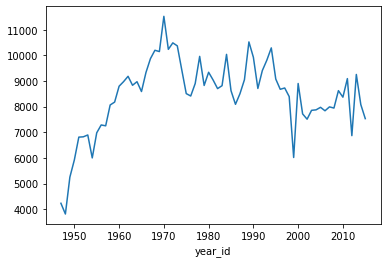

In [ ]:
nba[nba['fran_id']=='Knicks'].groupby('year_id')['pts'].sum().plot()

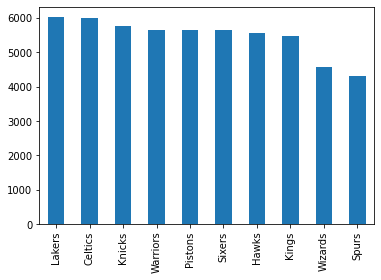

In [ ]:
nba['fran_id'].value_counts().head(10).plot(kind='bar')

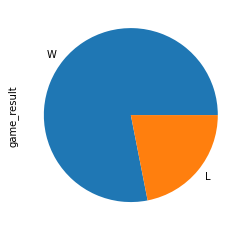

In [ ]:
nba[(nba['fran_id']=='Heat') & (nba['year_id']==2013)]['game_result'].value_counts().plot(kind='pie')

In [ ]:
nba[(nba['fran_id']=='Heat') & (nba['year_id']==2013)]['game_result']

118431    W
118469    L
118489    W
118514    W
118543    W
         ..
121044    L
121047    W
121048    L
121051    W
121052    W
Name: game_result, Length: 105, dtype: object